In [1]:
import cv2 as cv
import numpy as np
import math as m
from matplotlib import pyplot as plt

In [112]:
img=cv.imread('../blanks/índice.jpeg');
cv.imwrite("../Presentación/placa.jpg",img)

True

True

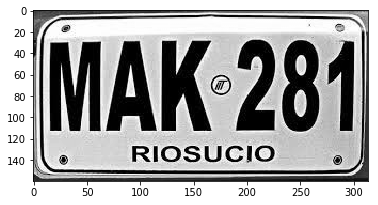

In [97]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap='gray')
cv.imwrite("../Presentación/blanco-negro.jpg",cv.cvtColor(img,cv.COLOR_BGR2GRAY))

In [98]:
#Definición de combinación RGB para trabajar
#I=cv.absdiff(rGb,rgB);
I=cv.cvtColor(img,cv.COLOR_BGR2GRAY);
II=I;
#cv.imshow('',II)
#cv.waitKey(0);

#Binarización inicial de la imagen
[fil,col]=I.shape
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]<25:
            I[i,j]=0;
            
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]>0:
            I[i,j]=1;

True

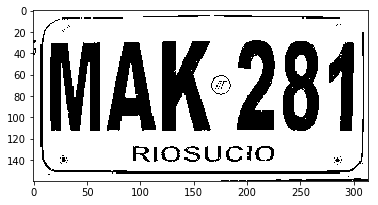

In [99]:
plt.imshow(I,cmap='gray')
I.shape
cv.imwrite("../Presentación/binai-1.jpg",I*255)

In [100]:
#Transformaciones morfologicas
se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(50, 50));
se2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11, 11));
closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
dilataion=cv.dilate(closing,se2)

#Encontrar contornos 
S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));

for j in range(num):
    box[j,:]=cv.boundingRect(cnt[j]);

L=np.zeros((num,4));
Max=[0,0];

for j in range(0,num):
    L[j,:]=box[j];
    if L[j,2]>Max[0]:
        Max=[j,L[j,2]];

BOX=box[Max[0],:];
#Mascara
b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
directorio2="../blanks/blank (%d).jpg" %(1);
cv.imwrite(directorio2,b);

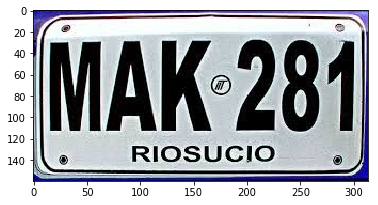

In [40]:
plt.imshow(b);

In [101]:
#Segmentación
directorio3="../blanks/blank (%d).jpg" %(1);
A=cv.imread(directorio3);
[fil,col,cap]=A.shape
rgB=A[:,:,0];
rGb=A[:,:,1];
Rgb=A[:,:,2];
#Nomrmalización
R=Rgb/255.0;
G=rGb/255.0;
B=rgB/255.0;
#construcción de espacio k de color
K=np.zeros((fil,col));
for i in range(0,fil):
    for j in range(0,col):        
        MAX=max(R[i,j],G[i,j],B[i,j]);
        K[i,j]=1-MAX;

cv.imwrite("./prueba.bmp",K);
k=cv.imread("./prueba.bmp");
BW1=cv.Laplacian(k,cv.CV_8UC1);
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

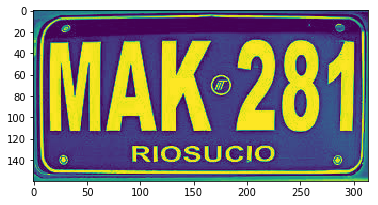

In [102]:
plt.imshow(K)

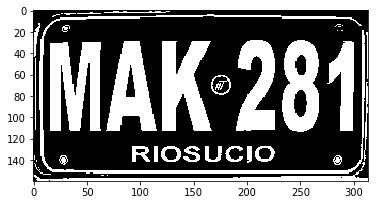

In [103]:
plt.imshow(k*255)

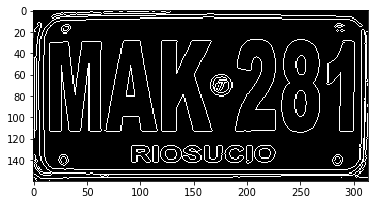

In [104]:
plt.imshow(BW1*255)

(160, 314)

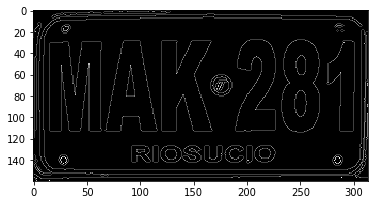

In [105]:
plt.imshow(Image,cmap='gray')
Image.shape

In [106]:
#Se calcula boundingRect para encontrar los caracteres de interes
ret,thresh=cv.threshold(Image,0,255,0);
S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));
for j in range(0,num):
    box[j,:]=cv.boundingRect(cnt[j]);
    
Box=np.zeros((20,4));
[L,A]=thresh.shape;
q=0;
for j in range(0,num):
    p=box[j,:]
    if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
        Box[q]=p;
        q=q+1;

BOX=np.zeros((6,4));
num=len(Box)
#Se procee a encntrar dobles
q=0;
for j in range(0,num):
    if j%2==0 and j<11:
        BOX[q]=Box[j];
        q=q+1;

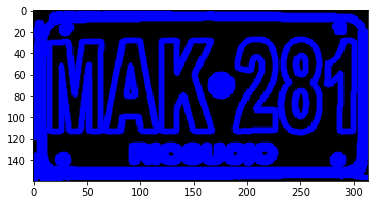

In [81]:
f=cv.drawContours(k,contours, -1, (0, 0, 255), 2, cv.LINE_AA)
plt.imshow(f)

In [88]:
for c in contours:
    area = cv.contourArea(c)
    if area > 1000 and area < 10000:
        (x, y, w, h) = cv.boundingRect(c)
        cv.rectangle(I, (x, y), (x + w, y + h), (0, 255, 0), 1, cv.LINE_AA)
        

True

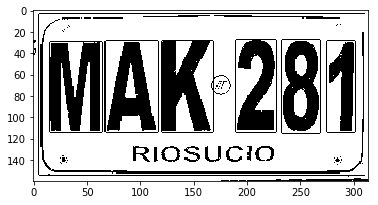

In [92]:
plt.imshow(I,cmap='gray')
cv.imwrite("../Presentación/rectrangles.jpg",I*255)

In [107]:
#calculo de las letras y números
BOX=BOX.astype(int)
LETRA1=img[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
LETRA2=img[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
LETRA3=img[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
NUM1=img[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
NUM2=img[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
NUM3=img[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];

In [76]:
BOX

array([[ 15,  29,  50,  85],
       [275,  28,  27,  86],
       [120,  28,  49,  86],
       [ 67,  28,  50,  86],
       [232,  27,  37,  88],
       [189,  27,  39,  87]])

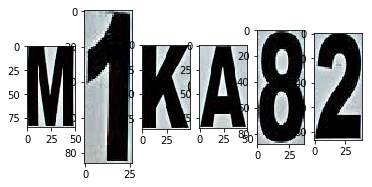

In [108]:
plt.subplot(161),plt.imshow(LETRA1);
plt.subplot(162),plt.imshow(LETRA2);
plt.subplot(163),plt.imshow(LETRA3);
plt.subplot(164),plt.imshow(NUM1);
plt.subplot(165),plt.imshow(NUM2);
plt.subplot(166),plt.imshow(NUM3);

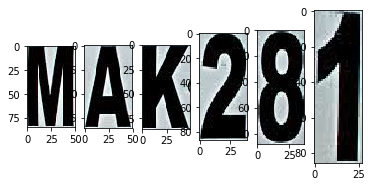

In [109]:

plt.subplot(161),plt.imshow(LETRA1);
plt.subplot(162),plt.imshow(NUM1);
plt.subplot(163),plt.imshow(LETRA3);
plt.subplot(164),plt.imshow(NUM3);
plt.subplot(165),plt.imshow(NUM2);
plt.subplot(166),plt.imshow(LETRA2);

In [111]:
cv.imwrite("../Presentación/Letra1.jpg",LETRA1);
cv.imwrite("../Presentación/Letra2.jpg",NUM1);
cv.imwrite("../Presentación/Letra3.jpg",LETRA3);
cv.imwrite("../Presentación/NUMERO1.jpg",NUM3);
cv.imwrite("../Presentación/NUMERO2.jpg",NUM2);
cv.imwrite("../Presentación/NUMERO3.jpg",LETRA2);